In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
customers = pd.read_csv('.\Ecommerce Customers')

In [4]:
customers.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [6]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


##EDA

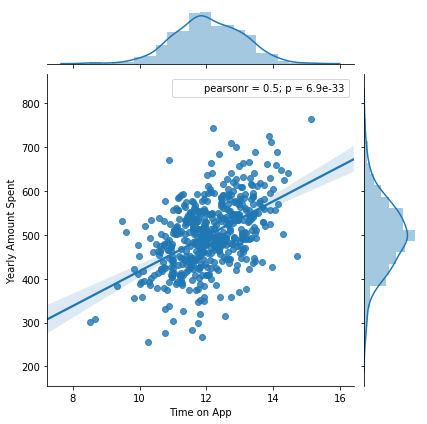

In [7]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers,kind='reg')

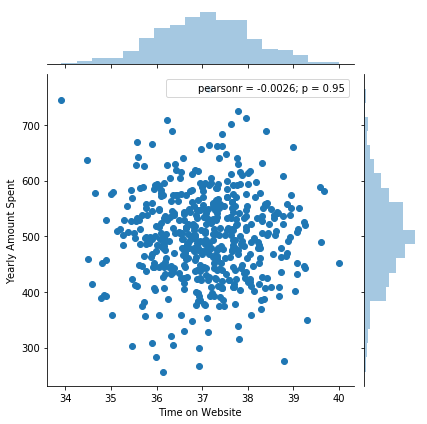

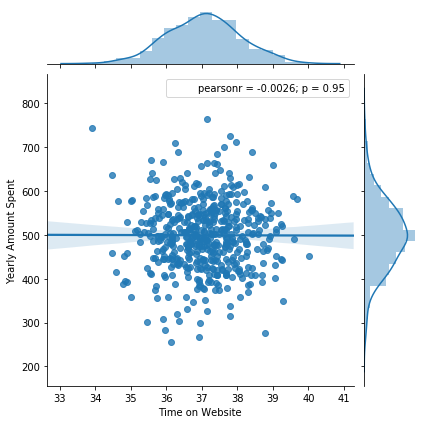

In [8]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers,kind='reg')

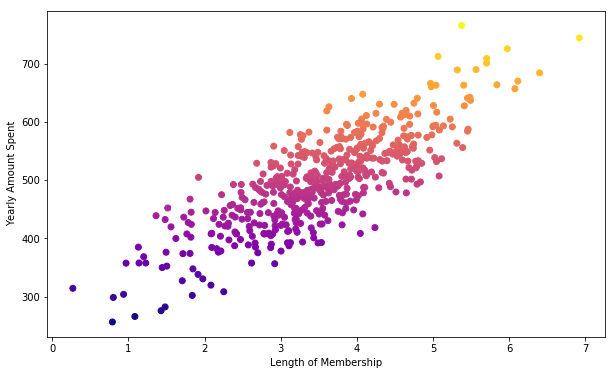

In [9]:
#sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=customers,color=customers['Yearly Amount Spent'],cmap='plasma')
plt.figure(figsize=(10,6))
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.scatter(customers['Length of Membership'],customers['Yearly Amount Spent'],c=customers['Yearly Amount Spent'],cmap='plasma')
plt.show()

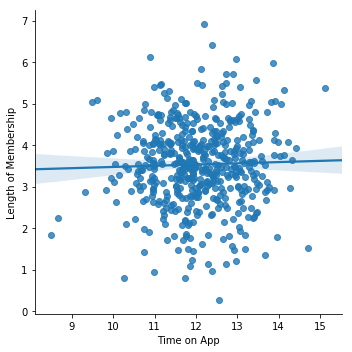

In [10]:
sns.lmplot(x ='Time on App',y='Length of Membership',data=customers)

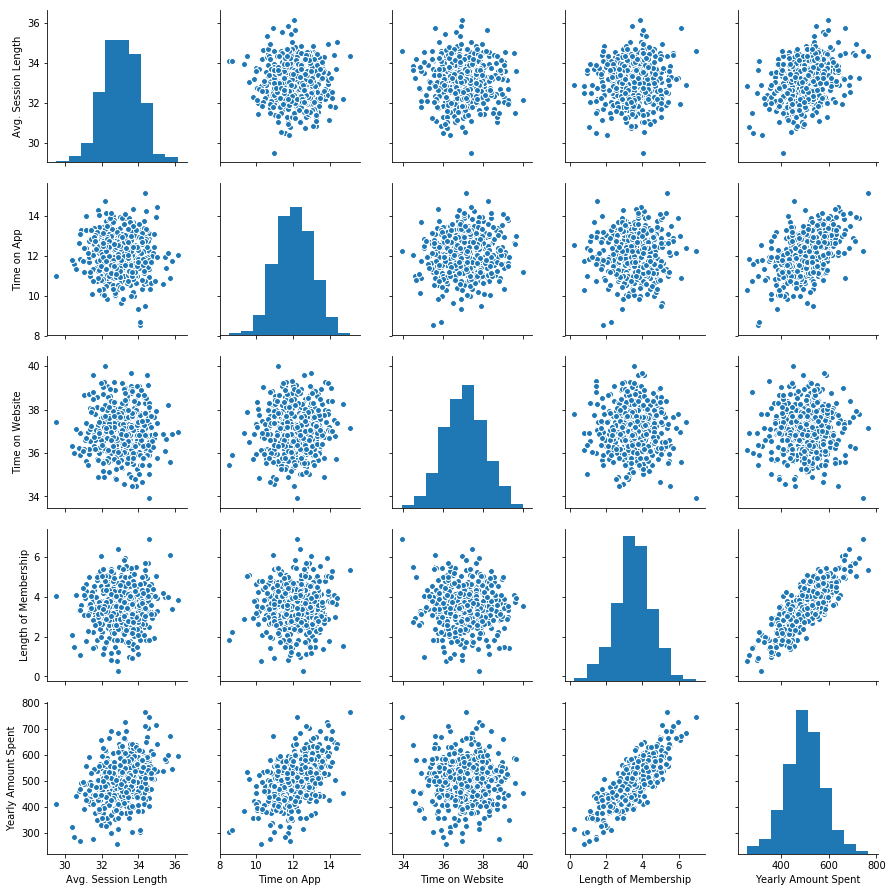

In [11]:
sns.pairplot(customers)

##apply machine learning
##linear regression model

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
predictors = customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = customers['Yearly Amount Spent']

In [14]:
x_train,x_test,y_train,y_test = train_test_split(predictors,y,test_size=0.3,random_state=108)

In [15]:
linearModel = LinearRegression()
linearModel.fit(x_train,y_train)
y_predictions = linearModel.predict(x_test)

##verify result and evaluate model

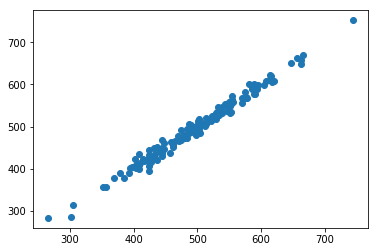

In [16]:
plt.scatter(y_test,y_predictions)

In [17]:
errors=y_test-y_predictions

In [18]:
from sklearn import metrics

In [19]:
print("root abs error: {}".format(metrics.mean_absolute_error(y_test,y_predictions)))
print("root square error: {}".format(metrics.mean_squared_error(y_test,y_predictions)))
print("root mean error: {}".format(np.sqrt(metrics.mean_squared_error(y_test,y_predictions))))

root abs error: 7.850915547713131
root square error: 97.33732813810512
root mean error: 9.86596818047297


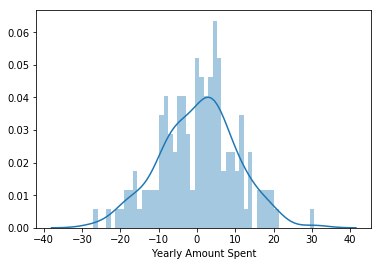

In [20]:
sns.distplot(errors,bins=50)

In [21]:
coefficients = pd.DataFrame(linearModel.coef_,index=x_train.columns)
print(linearModel.coef_.shape)

(4,)


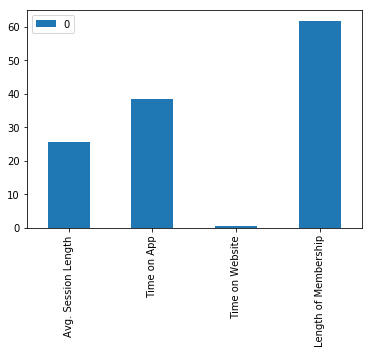

In [22]:
coefficients.plot.bar()

In [23]:
coefficients.shape

(4, 1)

In [24]:
coefficients.head()

,0
Avg. Session Length,25.612503
Time on App,38.485830
Time on Website,0.569818
Length of Membership,61.918842


In [25]:
##coefficients shows that mobile app is playing more important role in yearly amount spent